# dgesvd & dgemm scaling analysis

## Setup

In [57]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
%matplotlib inline
pd.set_option("display.max_rows", 16)

## Reading data

In [83]:
data = pd.read_excel('svd_benchmarks.xlsx')

In [42]:
data

,cluster,size,nodes,threads,HFD5 read (s),dgesvd (s),dgemm 1 & 2 (s),dgesvd efficiency,dgemm efficiency
0,thinking,1000000,1,1,0.035760,1.0600,0.15690,1.00,1.00
1,thinking,1000000,1,2,0.008324,0.6931,0.08490,0.76,0.92
2,thinking,1000000,1,4,0.008809,0.5592,0.04438,0.47,0.88
3,thinking,1000000,1,8,0.008725,0.5016,0.02702,0.26,0.73
4,thinking,1000000,1,10,0.009160,0.4786,0.02243,0.22,0.70
5,thinking,1000000,1,16,0.008274,0.4590,0.01920,0.14,0.51
6,thinking,1000000,1,20,0.008693,0.7924,0.02680,0.07,0.29
7,thinking,4000000,1,1,0.324400,7.6620,2.17500,1.00,1.00
...,...,...,...,...,...,...,...,...,...
41,cerebro,256000000,1,20,57.790000,1998.0000,51.66000,0.13,0.78


In [20]:
data.columns

Index(['cluster', 'size', 'nodes', 'threads', 'HFD5 read (s)', 'dgesvd (s)',
       'dgemm 1 & 2 (s)', 'dgesvd efficiency', 'dgemm efficiency'],
      dtype='object')

## dgesvd efficiency for thinking

In [29]:
thinking_svd = data[data['cluster'] == 'thinking'][['size', 'threads', 'dgesvd efficiency']].pivot_table(index='threads', columns=['size'])

In [30]:
thinking_svd

dgesvd efficiency                                        
size            1000000   4000000   16000000  64000000  256000000
threads                                                          
1                    1.00      1.00      1.00      1.00      1.00
2                    0.76      0.80      0.86      0.85      0.85
4                    0.47      0.63      0.72      0.75      0.77
8                    0.26      0.35      0.46      0.52      0.55
10                   0.22      0.33      0.41      0.44      0.47
16                   0.14      0.21      0.27      0.30      0.32
20                   0.07      0.13      0.22      0.24      0.26

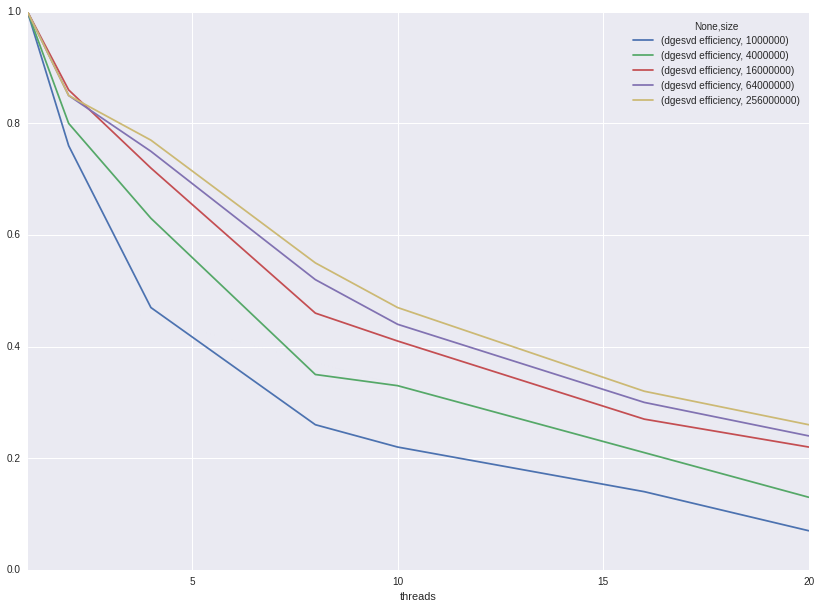

In [36]:
thinking_svd.plot(figsize=(14, 10));

## dgemm efficiency for thinking

In [37]:
thinking_dgemm = data[data['cluster'] == 'thinking'][['size', 'threads', 'dgemm efficiency']].pivot_table(index='threads', columns=['size'])

In [38]:
thinking_dgemm

dgemm efficiency                                        
size           1000000   4000000   16000000  64000000  256000000
threads                                                         
1                   1.00      1.00      1.00      1.00      1.00
2                   0.92      0.69      0.85      0.97      0.99
4                   0.88      1.03      0.85      0.91      0.96
8                   0.73      0.27      0.66      0.85      0.90
10                  0.70      0.44      0.58      0.79      0.86
16                  0.51      0.32      0.45      0.78      0.84
20                  0.29      0.12      0.62      0.71      0.81

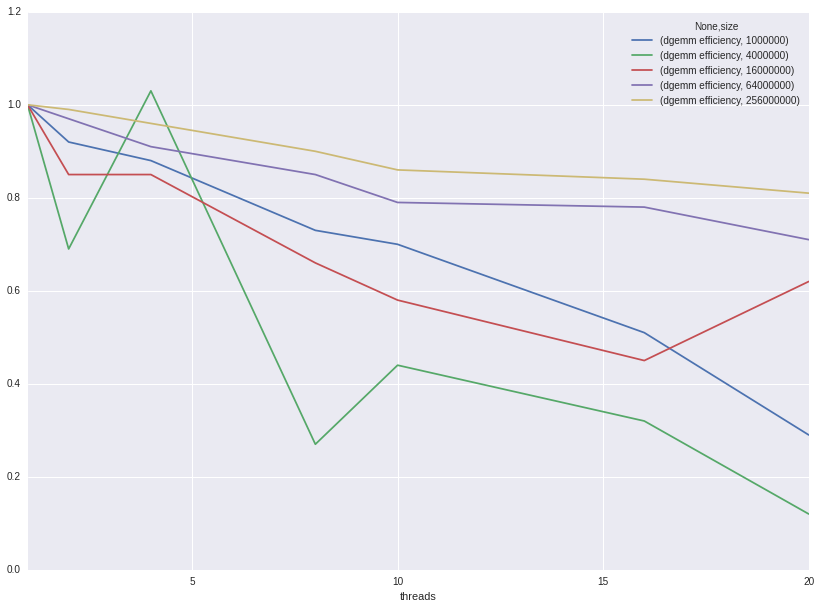

In [39]:
thinking_dgemm.plot(figsize=(14, 10));

## dgesvd scaling on thinking

In [47]:
dgesvd_thinking = data[((data['cluster'] == 'thinking') & (data['threads'] == 1))][['size', 'dgesvd (s)']]

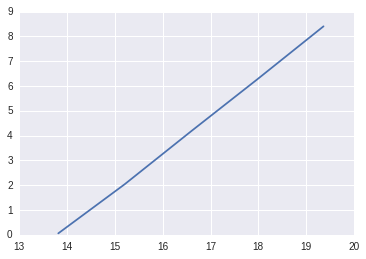

In [56]:
plt.plot(np.log(dgesvd_thinking['size']), np.log(dgesvd_thinking['dgesvd (s)']));

In [71]:
slope, intercept, *_ = stats.linregress(np.log(np.sqrt(dgesvd_thinking['size'])), np.log(dgesvd_thinking['dgesvd (s)']))
slope, intercept

(3.0190605914108359, -20.85316351931348)

## dgemm scaling on thinking

In [73]:
dgemm_thinking = data[((data['cluster'] == 'thinking') & (data['threads'] == 1))][['size', 'dgemm 1 & 2 (s)']]

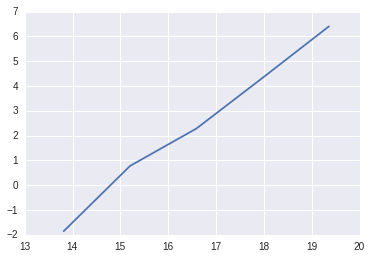

In [75]:
plt.plot(np.log(dgemm_thinking['size']), np.log(dgemm_thinking['dgemm 1 & 2 (s)']));

In [76]:
slope, intercept, *_ = stats.linregress(np.log(np.sqrt(dgemm_thinking['size'])), np.log(dgemm_thinking['dgemm 1 & 2 (s)']))
slope, intercept

(2.895390083850593, -21.625709389607451)

## dgesvd efficiency for cerebro

In [84]:
cerebro_svd = data[data['cluster'] == 'cerebro'][['size', 'threads', 'dgesvd efficiency']].pivot_table(index='threads', columns=['size'])

In [85]:
cerebro_svd

dgesvd efficiency          
size            64000000  256000000
threads                            
1                1.000000  1.000000
2                0.935974  0.528185
4                0.810888  0.264093
8                0.560050  0.232039
10               0.483538  0.169404
16               0.205586  0.134916
20               0.131837  0.128028

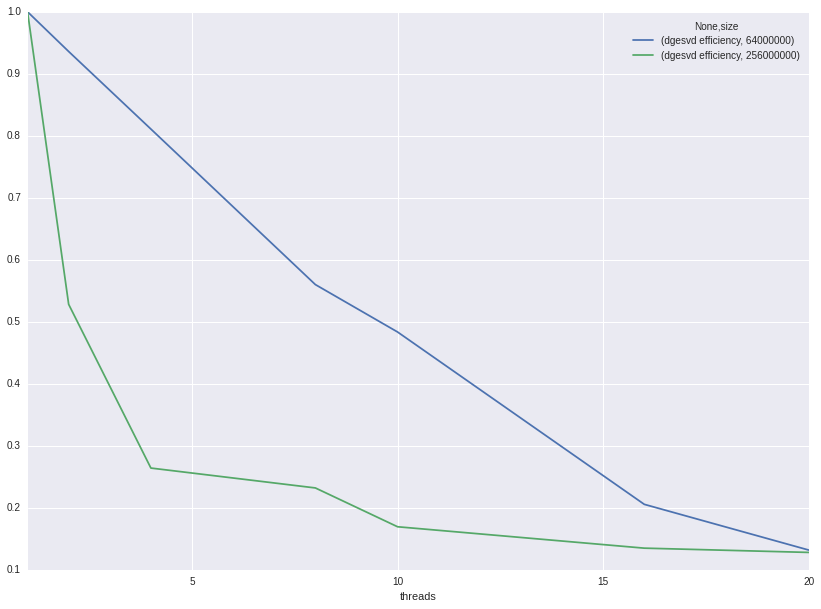

In [86]:
cerebro_svd.plot(figsize=(14,10));

## dgemm efficiency for cerebro

In [87]:
cerebro_dgemm = data[data['cluster'] == 'cerebro'][['size', 'threads', 'dgemm efficiency']].pivot_table(index='threads', columns=['size'])

In [88]:
cerebro_dgemm

dgemm efficiency          
size           64000000  256000000
threads                           
1               1.000000  1.000000
2               0.981655  0.987069
4               0.961759  0.976011
8               0.954822  0.958732
10              0.912886  0.953486
16              0.793676  0.811892
20              0.610067  0.775745

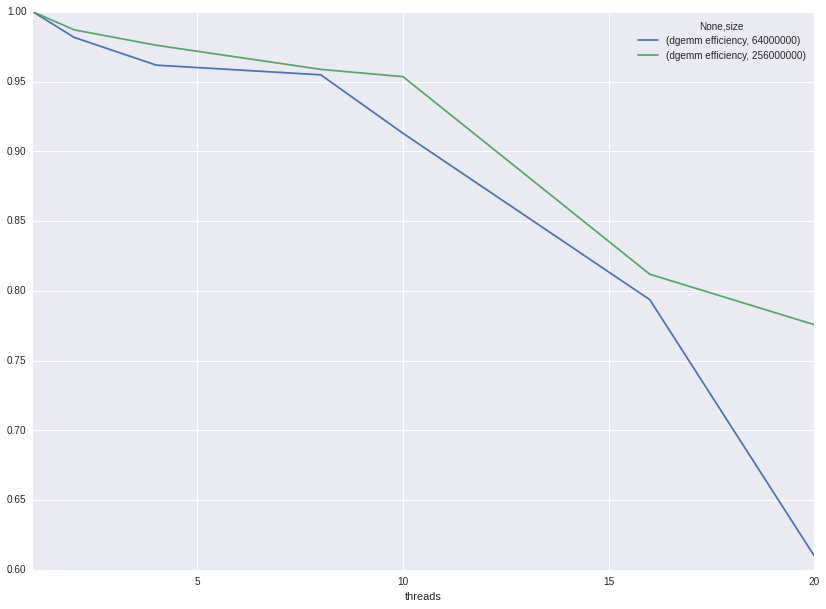

In [89]:
cerebro_dgemm.plot(figsize=(14,10));